Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

THE POISSON DISTRIBUTION

Use Poisson when:
1. Counting events in fixed interval (time, space, volume)
2. Events occur independently
3. Events are RARE (low probability)
4. Average rate (<U+03BB>) is constant

Biology Examples:
- Number of mutations in DNA sequence
- Number of cells in microscopy field
- Number of bacterial colonies on agar plate
- Number of action potentials in time window
- Number of predation events per day
- RNA-seq read counts

Key parameter: <U+03BB> (lambda) = average rate
Note: For Poisson, Mean = Variance = <U+03BB>

EXAMPLE 1: BACTERIAL COLONIES ON PLATES

Scenario: Plate bacteria, average <U+03BB> = 3.5 colonies per plate

Simulated 1000 plates:
Mean: 3.62 (expected: 3.5 )
Variance: 3.48 (expected: 3.5 )
SD: 1.86 (expected: 1.87 )

OBSERVATION: Simulation matches theory!
Note: Mean = Variance (special property of Poisson)

CALCULATING PROBABILITIES

Question 1: What's P(exactly 0 colonies) - sterile plate?
P(X = 0) = 0.0302 
About 3 % of plates will be steri

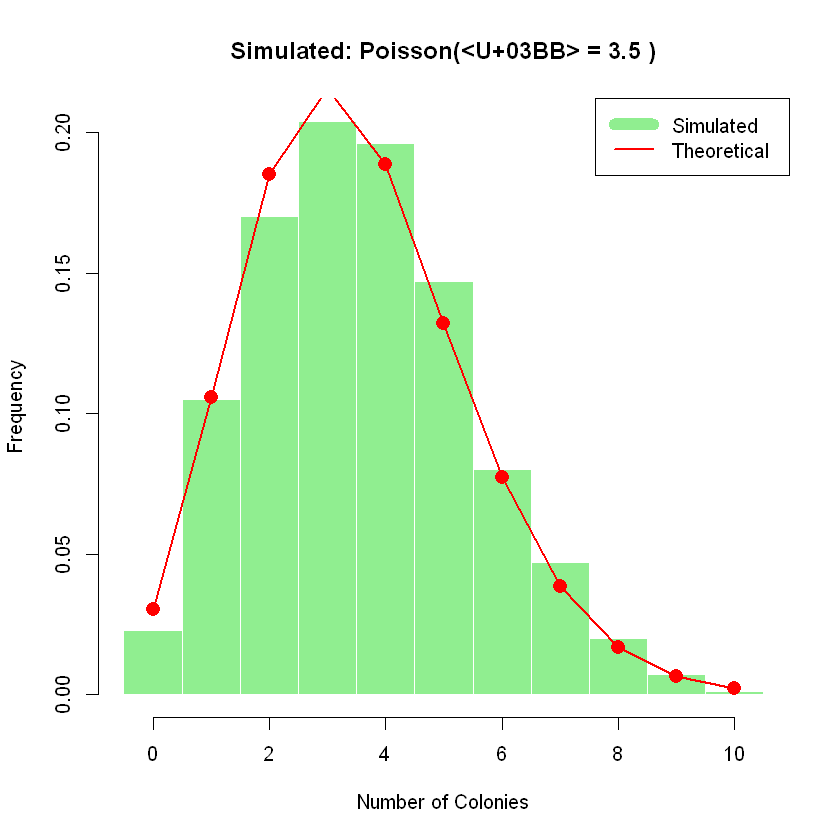

OBSERVATIONS:
1. As <U+03BB> increases, distribution spreads out (more variability)
2. As <U+03BB> increases, distribution becomes more symmetric
3. As <U+03BB> increases, looks more bell-shaped (normal!)
4. Peak is always near <U+03BB>

POISSON vs. BINOMIAL

Poisson is a limiting case of Binomial!
When n is large and p is small (but n×p stays constant):
Binomial(n, p) ˜ Poisson(<U+03BB> = n×p)

Binomial(n=1000, p=0.003) vs Poisson(<U+03BB>=3):



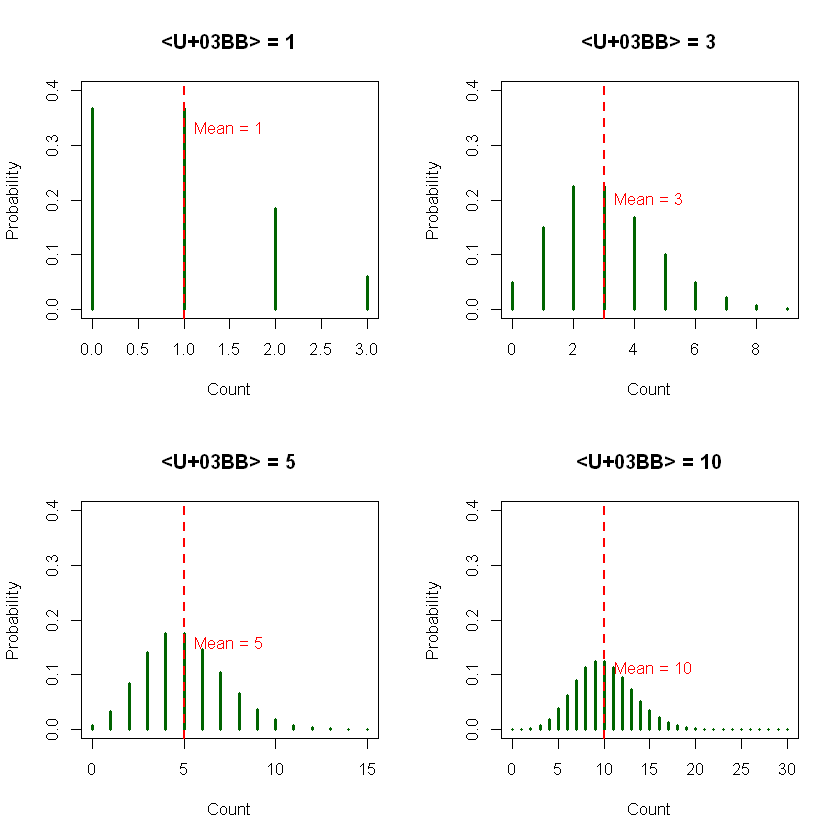

They're almost identical!
This is why Poisson is useful: simpler than binomial when n is huge

BIOLOGY APPLICATION: MUTATION COUNTING

Scenario: Sequence 10000 bp region
Mutation rate: 2e-04 per bp
Expected mutations: <U+03BB> = 2 

Distribution of mutations across 500 individuals:
mutations
  0   1   2   3   4   5   6   7 
 57 131 148  91  46  20   6   1 

Summary:
Mean: 2.05 
SD: 1.37 
Individuals with 0 mutations: 57 



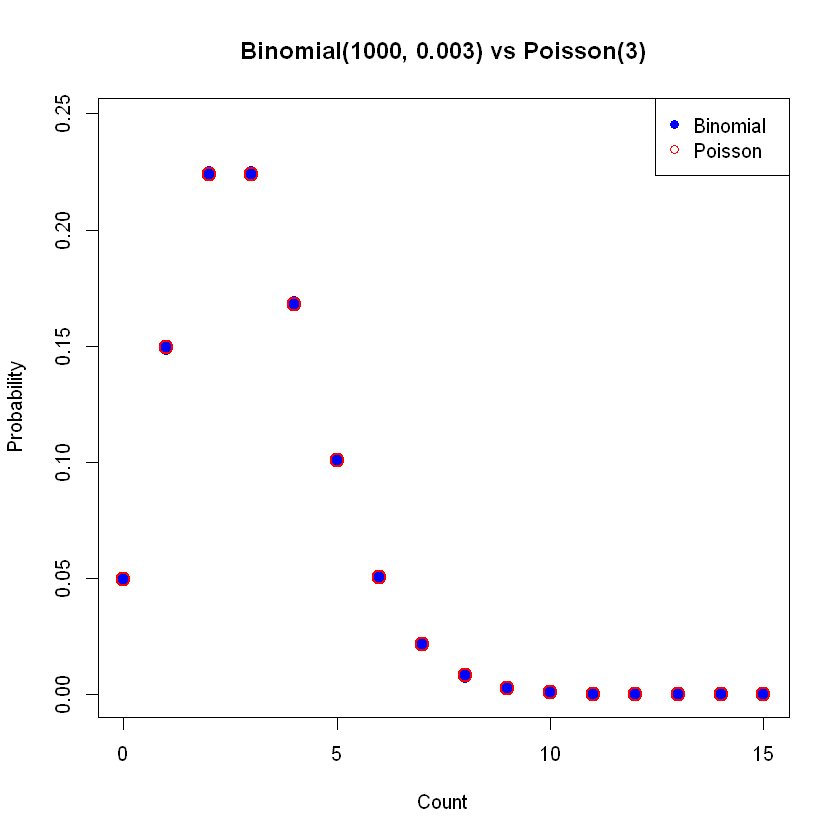

P(0 mutations) = 0.135 
P(1 mutation) = 0.271 
P(=3 mutations) = 0.323 

BIOLOGY APPLICATION: CELL COUNTING

Scenario: Count cells in microscopy field
Average: <U+03BB> = 15 cells per field

Observed in 100 fields:
Mean: 15.4 
SD: 4 
Range: 6 - 24 

Coefficient of Variation (CV): 0.26 
For Poisson: CV = 1/sqrt(<U+03BB>) = 0.258 



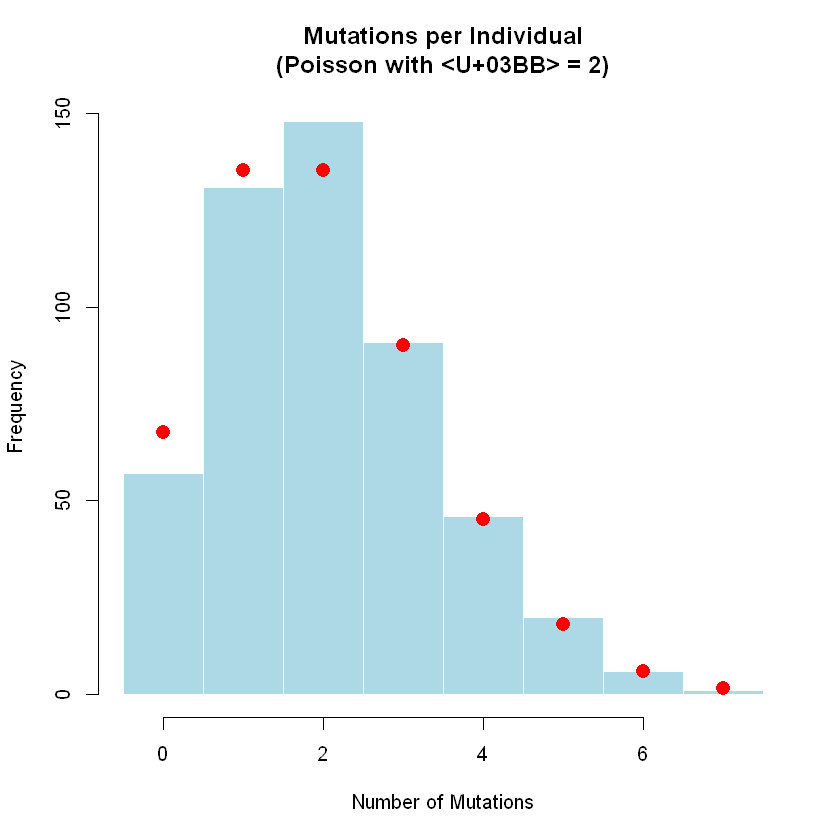


OVERDISPERSION: WHEN VARIANCE > MEAN

Poisson assumes: Variance = Mean
But real biology often shows OVERDISPERSION: Variance > Mean

Poisson data:
Mean: 4.99 
Variance: 4.64 
Ratio (Var/Mean): 0.93 ˜ 1

Overdispersed data:
Mean: 5.11 
Variance: 10.79 
Ratio (Var/Mean): 2.11 > 1 !



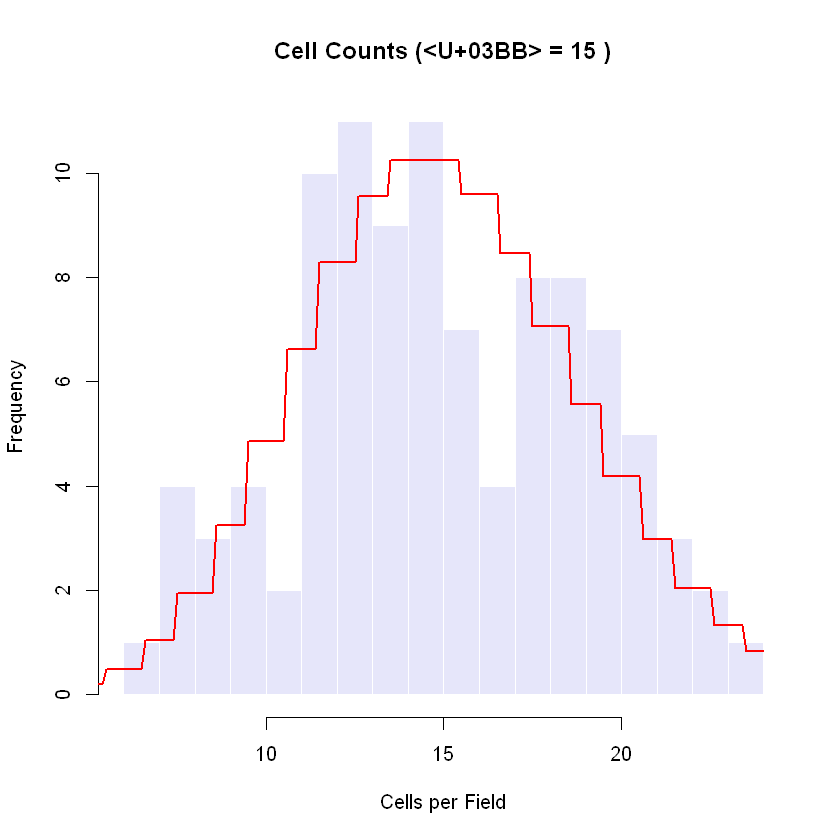

WHY OVERDISPERSION HAPPENS IN BIOLOGY:
- Clustering (cells aggregate, not randomly distributed)
- Heterogeneity (different individuals have different rates)
- Contagion (one event increases probability of others)
- Measurement error

SOLUTION: Use negative binomial or other models that allow Var > Mean

YOUR TURN: EXPLORE THE POISSON


POISSON IN REAL BIOLOGY RESEARCH:

1. RNA-SEQ ANALYSIS:
   - Read counts per gene modeled as Poisson
   - Actually use negative binomial (overdispersion!)
   - DESeq2, edgeR packages

2. SPATIAL ECOLOGY:
   - Number of organisms in quadrats
   - Test for random vs. clustered distribution
   - Poisson = random, overdispersed = clustered

3. NEUROSCIENCE:
   - Spike counts in time windows
   - Action potential rates
   - Synaptic vesicle release

4. EPIDEMIOLOGY:
   - Disease cases in regions/time periods
   - Rare event surveillance

5. GENETICS:
   - Mutation counts
   - Crossover events
   - CNV detection



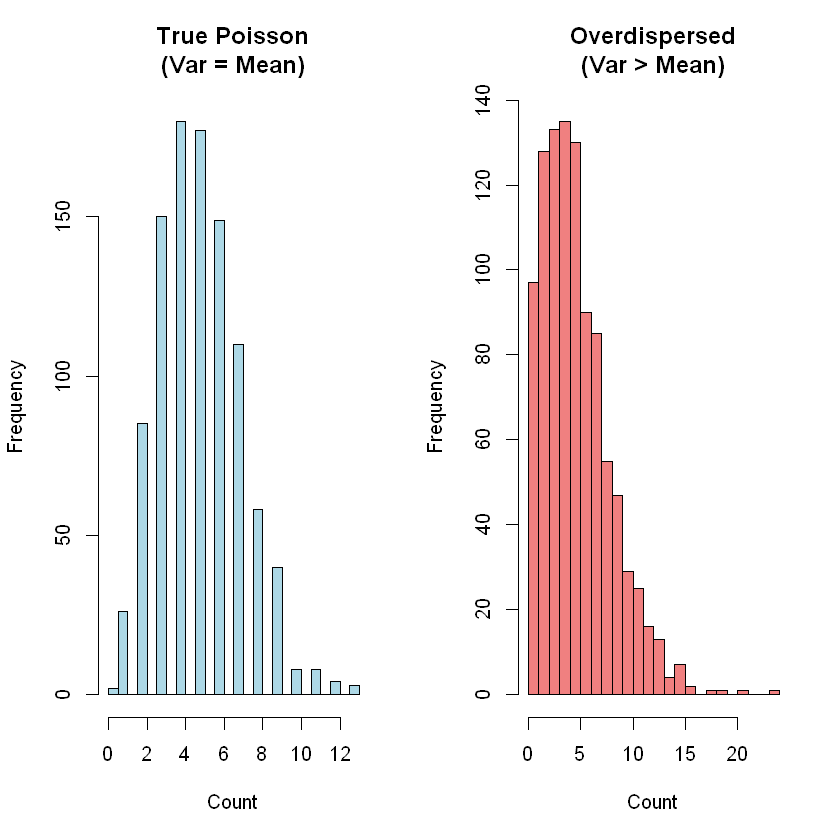

In [1]:
# =============================================================================
# Activity 7: Poisson Distribution for Count Data
# =============================================================================
# 
# GOAL: Understand the Poisson distribution for counting rare events
#
# CONCEPTS: Poisson distribution, rate parameter (λ), count data,
#           applications in biology
#
# WHEN TO USE: Count events occurring in fixed time/space/volume
#              when events are rare and independent
# =============================================================================

# -----------------------------------------------------------------------------
# PART 1: The Poisson Setup
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("THE POISSON DISTRIBUTION\n")
cat("=================================================================\n\n")

cat("Use Poisson when:\n")
cat("1. Counting events in fixed interval (time, space, volume)\n")
cat("2. Events occur independently\n")
cat("3. Events are RARE (low probability)\n")
cat("4. Average rate (λ) is constant\n\n")

cat("Biology Examples:\n")
cat("- Number of mutations in DNA sequence\n")
cat("- Number of cells in microscopy field\n")
cat("- Number of bacterial colonies on agar plate\n")
cat("- Number of action potentials in time window\n")
cat("- Number of predation events per day\n")
cat("- RNA-seq read counts\n\n")

cat("Key parameter: λ (lambda) = average rate\n")
cat("Note: For Poisson, Mean = Variance = λ\n\n")


# -----------------------------------------------------------------------------
# PART 2: Classic Example - Bacterial Colonies
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("EXAMPLE 1: BACTERIAL COLONIES ON PLATES\n")
cat("=================================================================\n\n")

# Plate bacteria on agar; on average 3.5 colonies per plate
lambda <- 3.5

cat("Scenario: Plate bacteria, average λ =", lambda, "colonies per plate\n\n")

# SIMULATION: Generate data for 1000 plates
set.seed(456)
n_plates <- 1000
colonies <- rpois(n = n_plates, lambda = lambda)

cat("Simulated 1000 plates:\n")
cat("Mean:", round(mean(colonies), 2), "(expected:", lambda, ")\n")
cat("Variance:", round(var(colonies), 2), "(expected:", lambda, ")\n")
cat("SD:", round(sd(colonies), 2), "(expected:", round(sqrt(lambda), 2), ")\n\n")

# Plot simulated data
hist(colonies,
     breaks = seq(-0.5, max(colonies) + 0.5, by = 1),
     col = "lightgreen",
     border = "white",
     main = paste("Simulated: Poisson(λ =", lambda, ")"),
     xlab = "Number of Colonies",
     ylab = "Frequency",
     probability = TRUE)

# Overlay theoretical distribution
x_values <- 0:max(colonies)
theoretical_probs <- dpois(x_values, lambda = lambda)
points(x_values, theoretical_probs, col = "red", pch = 16, cex = 1.5)
lines(x_values, theoretical_probs, col = "red", lwd = 2)

legend("topright",
       c("Simulated", "Theoretical"),
       col = c("lightgreen", "red"),
       lwd = c(10, 2))

cat("OBSERVATION: Simulation matches theory!\n")
cat("Note: Mean = Variance (special property of Poisson)\n\n")


# -----------------------------------------------------------------------------
# PART 3: Calculating Poisson Probabilities
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("CALCULATING PROBABILITIES\n")
cat("=================================================================\n\n")

# Three key functions:
# dpois(x, lambda) - P(X = x)
# ppois(x, lambda) - P(X ≤ x)
# rpois(n, lambda) - generate n random values

lambda <- 3.5

cat("Question 1: What's P(exactly 0 colonies) - sterile plate?\n")
p_zero <- dpois(0, lambda = lambda)
cat("P(X = 0) =", round(p_zero, 4), "\n")
cat("About", round(p_zero * 100, 1), "% of plates will be sterile\n\n")

# Verify with simulation
simulated_p <- mean(colonies == 0)
cat("From simulation:", round(simulated_p, 4), "\n\n")


cat("Question 2: What's P(exactly 3 colonies)?\n")
p_three <- dpois(3, lambda = lambda)
cat("P(X = 3) =", round(p_three, 4), "\n\n")

simulated_p <- mean(colonies == 3)
cat("From simulation:", round(simulated_p, 4), "\n\n")


cat("Question 3: What's P(at most 2 colonies)?\n")
p_at_most_2 <- ppois(2, lambda = lambda)
cat("P(X ≤ 2) =", round(p_at_most_2, 4), "\n\n")


cat("Question 4: What's P(more than 5 colonies)?\n")
p_more_than_5 <- 1 - ppois(5, lambda = lambda)
cat("P(X > 5) =", round(p_more_than_5, 4), "\n\n")


cat("Question 5: What's P(between 2 and 5, inclusive)?\n")
p_between <- ppois(5, lambda = lambda) - ppois(1, lambda = lambda)
cat("P(2 ≤ X ≤ 5) =", round(p_between, 4), "\n\n")


# -----------------------------------------------------------------------------
# PART 4: Effect of Rate Parameter (λ)
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("EFFECT OF RATE PARAMETER λ\n")
cat("=================================================================\n\n")

# Compare different rates
par(mfrow = c(2, 2))

for (lambda in c(1, 3, 5, 10)) {
  x <- 0:(lambda * 3)  # Show up to 3 times the mean
  probs <- dpois(x, lambda = lambda)
  
  plot(x, probs,
       type = "h", lwd = 3, col = "darkgreen",
       main = paste("λ =", lambda),
       xlab = "Count",
       ylab = "Probability",
       ylim = c(0, max(0.4, max(probs))))
  
  abline(v = lambda, col = "red", lwd = 2, lty = 2)
  text(lambda, max(probs) * 0.9, paste("Mean =", lambda), col = "red", pos = 4)
}

par(mfrow = c(1, 1))

cat("OBSERVATIONS:\n")
cat("1. As λ increases, distribution spreads out (more variability)\n")
cat("2. As λ increases, distribution becomes more symmetric\n")
cat("3. As λ increases, looks more bell-shaped (normal!)\n")
cat("4. Peak is always near λ\n\n")


# -----------------------------------------------------------------------------
# PART 5: Poisson vs. Binomial
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("POISSON vs. BINOMIAL\n")
cat("=================================================================\n\n")

cat("Poisson is a limiting case of Binomial!\n")
cat("When n is large and p is small (but n×p stays constant):\n")
cat("Binomial(n, p) ≈ Poisson(λ = n×p)\n\n")

# Demonstration
n <- 1000
p <- 0.003
lambda <- n * p  # = 3

cat("Binomial(n=", n, ", p=", p, ") vs Poisson(λ=", lambda, "):\n\n", sep="")

x <- 0:15
binom_probs <- dbinom(x, size = n, prob = p)
poisson_probs <- dpois(x, lambda = lambda)

plot(x, binom_probs,
     type = "p", pch = 16, col = "blue", cex = 1.5,
     main = "Binomial(1000, 0.003) vs Poisson(3)",
     xlab = "Count",
     ylab = "Probability",
     ylim = c(0, max(binom_probs, poisson_probs) * 1.1))
points(x, poisson_probs, pch = 1, col = "red", cex = 1.5, lwd = 2)
legend("topright",
       c("Binomial", "Poisson"),
       col = c("blue", "red"),
       pch = c(16, 1))

cat("They're almost identical!\n")
cat("This is why Poisson is useful: simpler than binomial when n is huge\n\n")


# -----------------------------------------------------------------------------
# PART 6: Real Biology Example - Mutations
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("BIOLOGY APPLICATION: MUTATION COUNTING\n")
cat("=================================================================\n\n")

# Sequence a 10,000 bp region
# Mutation rate: 2 × 10^-4 per base pair
# Expected mutations: 10,000 × 0.0002 = 2

region_length <- 10000
mutation_rate <- 2e-4
expected_mutations <- region_length * mutation_rate

cat("Scenario: Sequence", region_length, "bp region\n")
cat("Mutation rate:", mutation_rate, "per bp\n")
cat("Expected mutations: λ =", expected_mutations, "\n\n")

# Simulate 500 individuals
n_individuals <- 500
mutations <- rpois(n_individuals, lambda = expected_mutations)

cat("Distribution of mutations across", n_individuals, "individuals:\n")
print(table(mutations))

cat("\nSummary:\n")
cat("Mean:", round(mean(mutations), 2), "\n")
cat("SD:", round(sd(mutations), 2), "\n")
cat("Individuals with 0 mutations:", sum(mutations == 0), "\n\n")

# Visualize
hist(mutations,
     breaks = seq(-0.5, max(mutations) + 0.5, by = 1),
     col = "lightblue",
     border = "white",
     main = "Mutations per Individual\n(Poisson with λ = 2)",
     xlab = "Number of Mutations",
     ylab = "Frequency")

# Theoretical probabilities
x_vals <- 0:max(mutations)
theoretical <- dpois(x_vals, lambda = expected_mutations)
points(x_vals, theoretical * n_individuals, col = "red", pch = 16, cex = 1.5)

# Probabilities of interest
cat("P(0 mutations) =", round(dpois(0, lambda = expected_mutations), 3), "\n")
cat("P(1 mutation) =", round(dpois(1, lambda = expected_mutations), 3), "\n")
cat("P(≥3 mutations) =", round(1 - ppois(2, lambda = expected_mutations), 3), "\n\n")


# -----------------------------------------------------------------------------
# PART 7: Cell Counting Example
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("BIOLOGY APPLICATION: CELL COUNTING\n")
cat("=================================================================\n\n")

# Count cells in microscopy chamber
# Average: 15 cells per field of view

lambda_cells <- 15

cat("Scenario: Count cells in microscopy field\n")
cat("Average: λ =", lambda_cells, "cells per field\n\n")

# Simulate 100 fields
n_fields <- 100
cell_counts <- rpois(n_fields, lambda = lambda_cells)

cat("Observed in", n_fields, "fields:\n")
cat("Mean:", round(mean(cell_counts), 1), "\n")
cat("SD:", round(sd(cell_counts), 1), "\n")
cat("Range:", min(cell_counts), "-", max(cell_counts), "\n\n")

# Coefficient of Variation (CV)
cv <- sd(cell_counts) / mean(cell_counts)
cat("Coefficient of Variation (CV):", round(cv, 3), "\n")
cat("For Poisson: CV = 1/sqrt(λ) =", round(1/sqrt(lambda_cells), 3), "\n\n")

# Plot
hist(cell_counts,
     breaks = 20,
     col = "lavender",
     border = "white",
     main = paste("Cell Counts (λ =", lambda_cells, ")"),
     xlab = "Cells per Field",
     ylab = "Frequency")

# Add theoretical curve
x_smooth <- seq(0, max(cell_counts), by = 0.1)
theoretical_smooth <- dpois(round(x_smooth), lambda = lambda_cells)
lines(x_smooth, theoretical_smooth * n_fields * 1, col = "red", lwd = 2)


# -----------------------------------------------------------------------------
# PART 8: Overdispersion - When Poisson Doesn't Fit
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("OVERDISPERSION: WHEN VARIANCE > MEAN\n")
cat("=================================================================\n\n")

cat("Poisson assumes: Variance = Mean\n")
cat("But real biology often shows OVERDISPERSION: Variance > Mean\n\n")

# Simulate overdispersed data (negative binomial)
# This happens when there's extra variability beyond Poisson

# True Poisson
poisson_data <- rpois(1000, lambda = 5)

# Overdispersed (negative binomial approximation)
# Simulate by adding extra variability
overdispersed_data <- rpois(1000, lambda = rgamma(1000, shape = 5, rate = 1))

cat("Poisson data:\n")
cat("Mean:", round(mean(poisson_data), 2), "\n")
cat("Variance:", round(var(poisson_data), 2), "\n")
cat("Ratio (Var/Mean):", round(var(poisson_data) / mean(poisson_data), 2), "≈ 1\n\n")

cat("Overdispersed data:\n")
cat("Mean:", round(mean(overdispersed_data), 2), "\n")
cat("Variance:", round(var(overdispersed_data), 2), "\n")
cat("Ratio (Var/Mean):", round(var(overdispersed_data) / mean(overdispersed_data), 2), "> 1 !\n\n")

# Compare visually
par(mfrow = c(1, 2))

hist(poisson_data,
     breaks = 20,
     col = "lightblue",
     main = "True Poisson\n(Var = Mean)",
     xlab = "Count")

hist(overdispersed_data,
     breaks = 20,
     col = "lightcoral",
     main = "Overdispersed\n(Var > Mean)",
     xlab = "Count")

par(mfrow = c(1, 1))

cat("WHY OVERDISPERSION HAPPENS IN BIOLOGY:\n")
cat("- Clustering (cells aggregate, not randomly distributed)\n")
cat("- Heterogeneity (different individuals have different rates)\n")
cat("- Contagion (one event increases probability of others)\n")
cat("- Measurement error\n\n")

cat("SOLUTION: Use negative binomial or other models that allow Var > Mean\n\n")


# -----------------------------------------------------------------------------
# PART 9: YOUR TURN - Explore!
# -----------------------------------------------------------------------------

cat("=================================================================\n")
cat("YOUR TURN: EXPLORE THE POISSON\n")
cat("=================================================================\n\n")

# TODO 1: RNA-seq reads
# Gene expression measured by read counts
# Average: λ = 50 reads per gene
# Simulate 100 genes
# What proportion have 0 reads? (These might be "not expressed")
# Plot the distribution


# TODO 2: Rare disease
# Disease events in hospital: average 0.5 per month
# What's P(0 events in a month)?
# What's P(more than 2 events)?
# If you observe 3 events in one month, is this unusual?


# TODO 3: Waiting time
# On average, 3 customers per hour
# What's P(0 customers in one hour)?
# What's P(at least 5 customers)?


# TODO 4: Compare rates
# Two bacterial strains with λ = 10 and λ = 15 colonies
# Simulate 100 plates of each
# Plot side-by-side histograms
# Can you visually distinguish them?


# TODO 5: Test for Poisson
# Generate data: x <- rpois(100, lambda = 5)
# Calculate mean and variance
# Are they approximately equal?
# Plot histogram and overlay theoretical Poisson


# -----------------------------------------------------------------------------
# PART 10: Connection to Real Research
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("POISSON IN REAL BIOLOGY RESEARCH:\n")
cat("=================================================================\n\n")

cat("1. RNA-SEQ ANALYSIS:\n")
cat("   - Read counts per gene modeled as Poisson\n")
cat("   - Actually use negative binomial (overdispersion!)\n")
cat("   - DESeq2, edgeR packages\n\n")

cat("2. SPATIAL ECOLOGY:\n")
cat("   - Number of organisms in quadrats\n")
cat("   - Test for random vs. clustered distribution\n")
cat("   - Poisson = random, overdispersed = clustered\n\n")

cat("3. NEUROSCIENCE:\n")
cat("   - Spike counts in time windows\n")
cat("   - Action potential rates\n")
cat("   - Synaptic vesicle release\n\n")

cat("4. EPIDEMIOLOGY:\n")
cat("   - Disease cases in regions/time periods\n")
cat("   - Rare event surveillance\n\n")

cat("5. GENETICS:\n")
cat("   - Mutation counts\n")
cat("   - Crossover events\n")
cat("   - CNV detection\n\n")


# -----------------------------------------------------------------------------
# DISCUSSION QUESTIONS
# -----------------------------------------------------------------------------
#
# 1. Why does the Poisson distribution only take non-negative integer values?
#
# 2. The Poisson has Mean = Variance. What does this tell you about the
#    relationship between the center and spread of the distribution?
#
# 3. When would you use Poisson vs. Binomial? Give specific examples.
#
# 4. In RNA-seq, read counts are often overdispersed (Var > Mean).
#    What biological factors might cause this?
#
# 5. If you observe 0 events when λ = 5, does this mean something unusual
#    happened? Calculate P(X = 0) when λ = 5.
#
# 6. The Poisson distribution approaches normal as λ increases.
#    At what value of λ does it start looking fairly normal?
#    (Try plotting different values)
#
# =============================================================================